<a href="https://colab.research.google.com/github/YuvinNavod/Python-Machine-Learning-Projects/blob/main/12_Big_Mart_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

data set=https://www.kaggle.com/datasets/brijbhushannanda1979/bigmart-sales-data

import dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

import dataset

In [2]:
mart_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/machine learning projects/12. Big Mart Sales Prediction/Train.csv')

In [3]:
#first five rows
mart_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
#last five Coumns
mart_df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [5]:
#how many rows in df
mart_df.shape

(8523, 12)

In [6]:
#information about df
mart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
#check null value
mart_df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


Catogorical values


*   Item_Identifier
*   Item_Fat_Content
*   Item_Type
*   Outlet_Identifier
*   Outlet_Size
*   Outlet_Location_Type
*   Outlet_Type   




Handling missng value


mean --->avarage
mode -->most repeted

In [8]:
#mean value of Item_Weight column
mart_df['Item_Weight'].mean()

np.float64(12.857645184135976)

In [9]:
#filling the missing value in Item_Weight colum with missing values
mart_df['Item_Weight'].fillna(mart_df['Item_Weight'].mean(), inplace=True)

<ipython-input-9-86985e648f7d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mart_df['Item_Weight'].fillna(mart_df['Item_Weight'].mean(), inplace=True)


In [10]:
mart_df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


replace the missing values in Outlet_Size with mode

In [11]:
mode_of_Outlet_size = mart_df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x:x.mode()[0]))
print(mode_of_Outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [12]:
missing_values = mart_df['Outlet_Size'].isnull()
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [13]:
mart_df.loc[missing_values, 'Outlet_Size'] = mart_df.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [14]:
mart_df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


### Data analysis

In [15]:
#statistical mesures
mart_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### numarical featuuers

In [16]:
sns.set()

<ipython-input-17-faf69f861820>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mart_df['Item_Weight'])


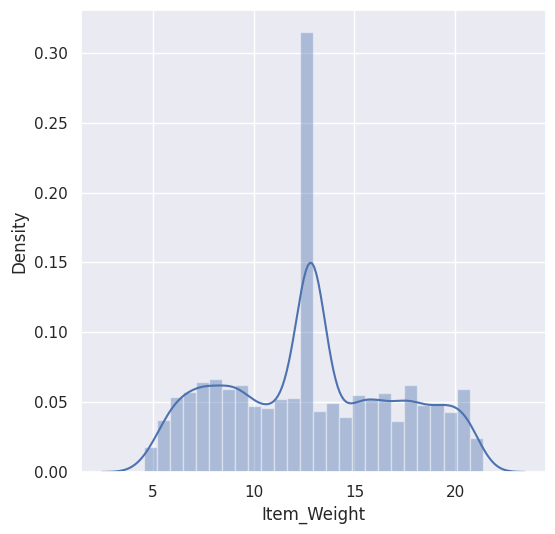

In [17]:
#	Item_Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(mart_df['Item_Weight'])
plt.show()

<ipython-input-18-f030f290a93a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mart_df['Item_Visibility'])


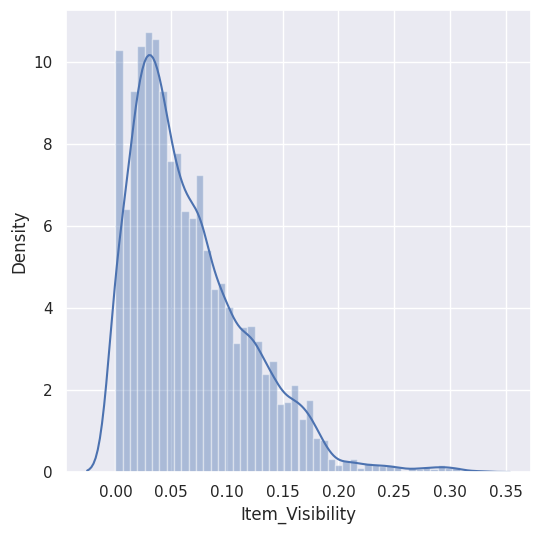

In [18]:
#Item_Visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(mart_df['Item_Visibility'])
plt.show()

<ipython-input-19-0d1759029e84>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mart_df['Item_MRP'])


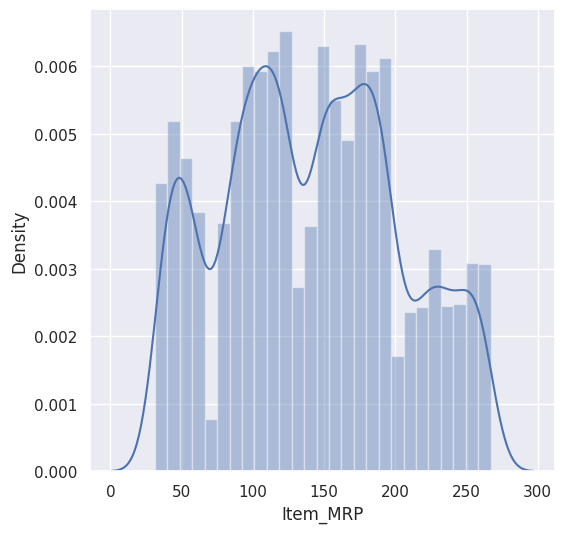

In [19]:
#Item_MRP Distribution
plt.figure(figsize=(6,6))
sns.distplot(mart_df['Item_MRP'])
plt.show()

<ipython-input-20-fdcb9cba5af0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mart_df['Item_Outlet_Sales'])


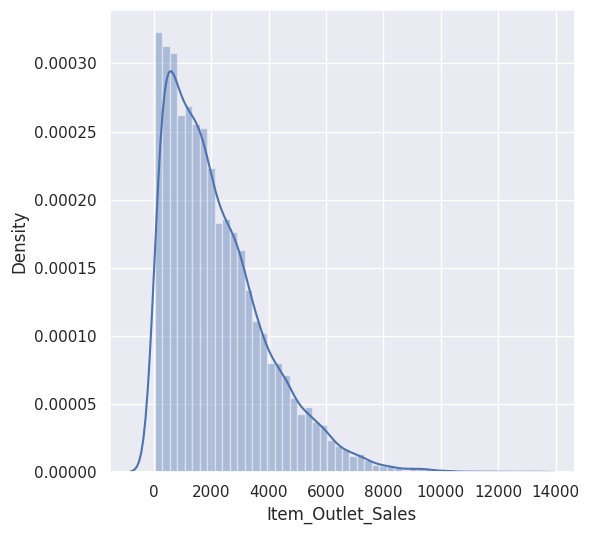

In [20]:
#Item_Outlet_Sales
plt.figure(figsize=(6,6))
sns.distplot(mart_df['Item_Outlet_Sales'])
plt.show()

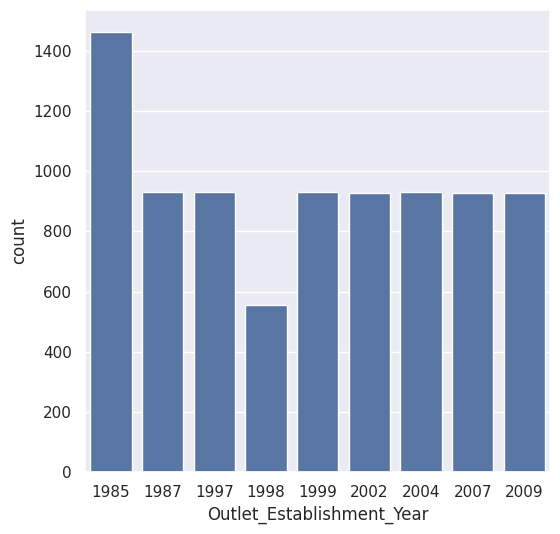

In [21]:
#Outlet_Establishment_Year Distribution
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year',data =mart_df)
plt.show()
#

### catogarical daata


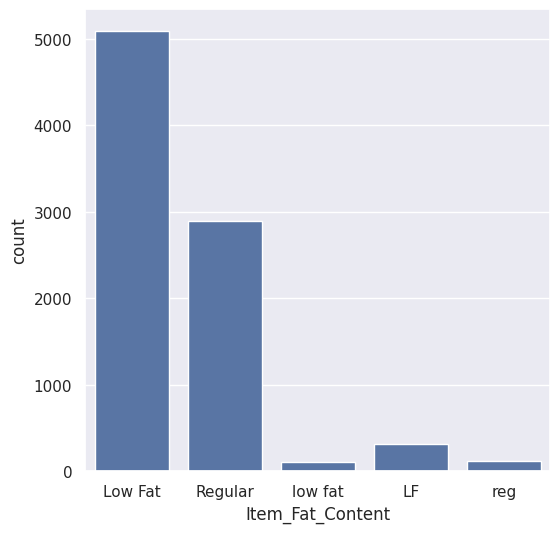

In [22]:
#Item_Fat_Content Distribution
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content',data =mart_df)
plt.show()
#

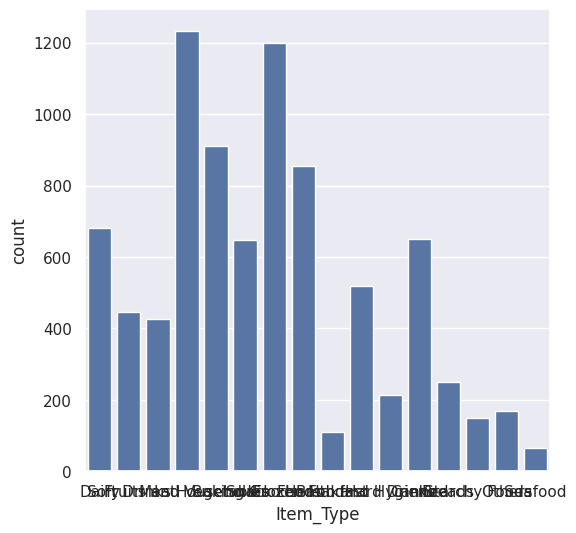

In [23]:
#Item_Type Distribution
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Type',data =mart_df)
plt.show()

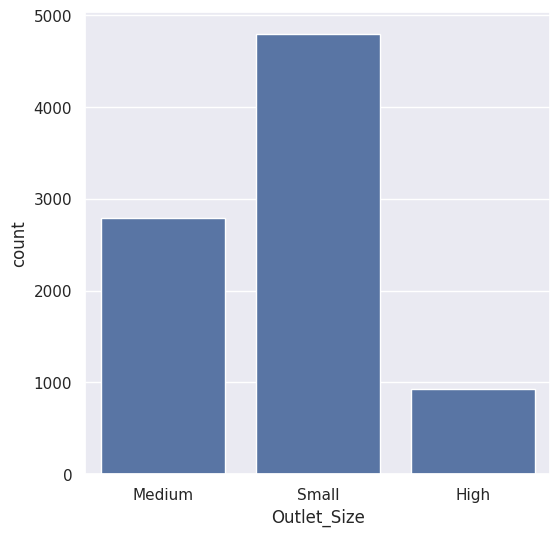

In [24]:
#Outlet_Size Distribution
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size',data =mart_df)
plt.show()

## Data pre processing

In [25]:
mart_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [26]:
mart_df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [27]:
mart_df.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [28]:
mart_df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


lable encoding

In [29]:
encoder = LabelEncoder()

In [33]:
mart_df['Item_Identifier'] = encoder.fit_transform(mart_df['Item_Identifier'])
mart_df['Item_Fat_Content	'] = encoder.fit_transform(mart_df['Item_Fat_Content'])
mart_df['Item_Type'] = encoder.fit_transform(mart_df['Item_Type'])
mart_df['Item_Fat_Content'] = encoder.fit_transform(mart_df['Item_Fat_Content'])
mart_df['Outlet_Identifier'] = encoder.fit_transform(mart_df['Outlet_Identifier'])
mart_df['Outlet_Size'] = encoder.fit_transform(mart_df['Outlet_Size'])
mart_df['Outlet_Location_Type'] = encoder.fit_transform(mart_df['Outlet_Location_Type'])
mart_df['Outlet_Type'] = encoder.fit_transform(mart_df['Outlet_Type'])

In [34]:
mart_df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content\t
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,0
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228,1
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,0
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800,1
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052,0


### spliting features and target

In [35]:
X= mart_df.drop(columns='Item_Outlet_Sales',axis=1)
Y= mart_df['Item_Outlet_Sales']

### Tran test split

In [36]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [37]:
#shape
print(X.shape,X_train.shape,X_test.shape)

(8523, 12) (6818, 12) (1705, 12)


## model initilization

In [39]:
model = XGBRegressor()

### **#train model**


In [40]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## evaluvation model

evaluvate from traing data

In [41]:
train_prediction = model.predict(X_train)
train_acuracy = metrics.r2_score(Y_train,train_prediction)
print ('traning acuracy:',train_acuracy)

traning acuracy: 0.8762174618111388


evaluate from test data

In [42]:
test_prediction = model.predict(X_test)
test_acuracy = metrics.r2_score(Y_test,test_prediction)
print ('test acuracy:',test_acuracy)

test acuracy: 0.5017253991620692
